### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### load and review dataset

In [2]:
df=pd.read_csv("credit_card.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1762,C11822,2833.613641,1.000000,1387.52,526.12,861.40,1442.587409,1.000000,0.250000,0.750000,0.166667,5,20,3000.0,1564.459934,2019.019279,0.000000,12
2259,C12330,598.423093,1.000000,5835.57,3974.70,1860.87,0.000000,1.000000,0.833333,0.750000,0.000000,0,53,9000.0,6083.426724,204.763572,0.916667,12
1160,C11203,6.903243,0.727273,145.01,0.00,145.01,0.000000,0.750000,0.000000,0.750000,0.000000,0,9,3000.0,162.930205,66.976840,0.142857,12
4662,C14789,975.252077,1.000000,1146.74,796.74,350.00,0.000000,0.857143,0.142857,0.714286,0.000000,0,8,1000.0,1273.063087,252.669070,0.000000,7
5306,C15456,135.856693,0.750000,843.95,198.00,645.95,0.000000,0.750000,0.250000,0.625000,0.000000,0,25,1200.0,862.494363,113.077567,1.000000,8


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### a. Missing Value Analysis

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df['CREDIT_LIMIT'].fillna(int(df['CREDIT_LIMIT'].mean()), inplace=True)

In [8]:
df['MINIMUM_PAYMENTS'].fillna(int(df['MINIMUM_PAYMENTS'].mean()), inplace=True)

In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
df.drop(['CUST_ID'], axis = 1,inplace=True)

In [11]:
outlier=df.select_dtypes(['number'])

<AxesSubplot:>

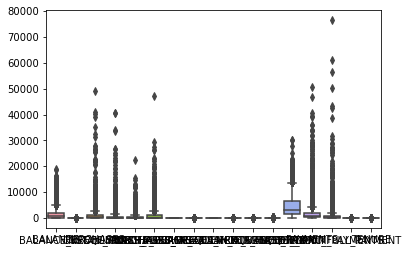

In [12]:
sns.boxplot(data=df)

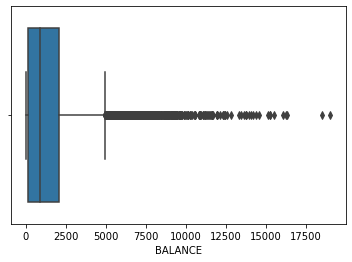

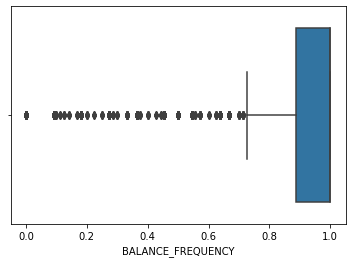

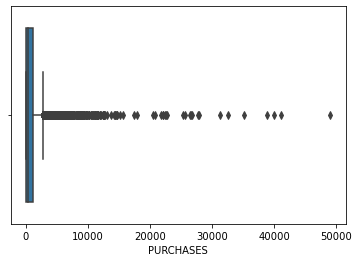

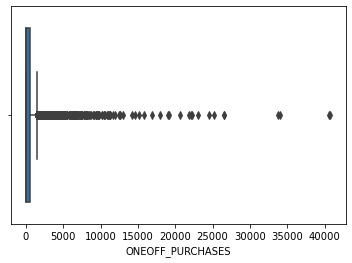

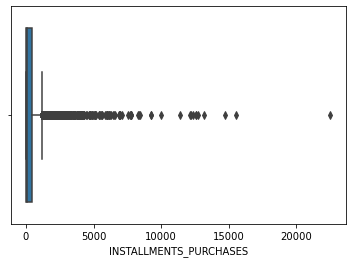

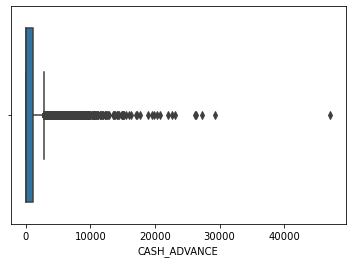

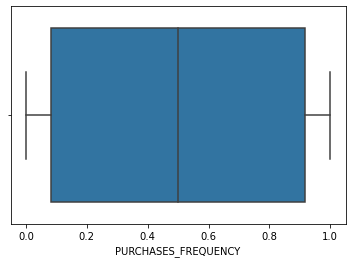

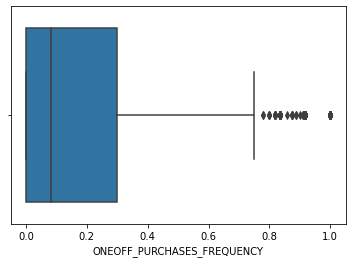

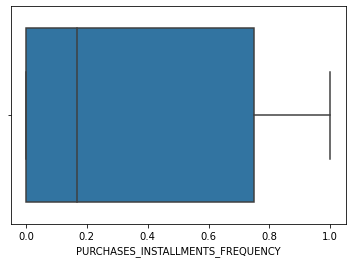

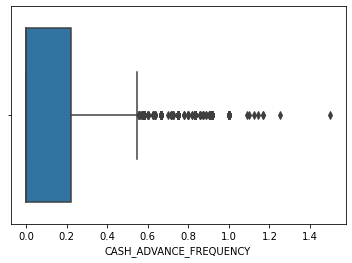

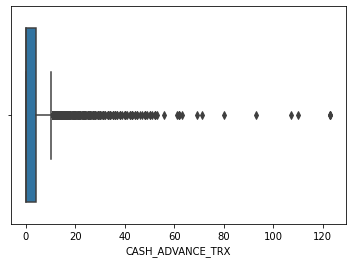

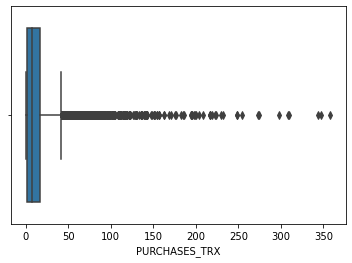

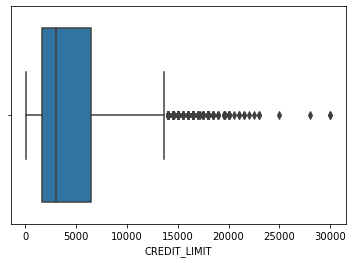

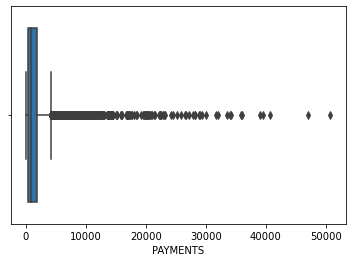

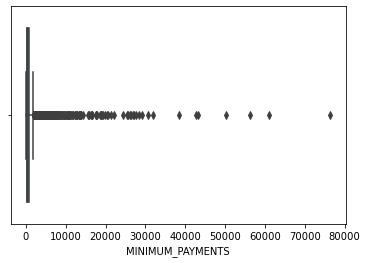

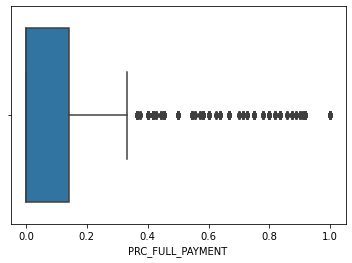

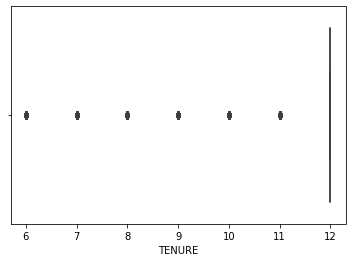

In [13]:
for column in outlier:
    plt.figure()
    sns.boxplot(x=column,data=outlier)

### b. Outlier Treatment using the Z-score method

In [14]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.73198937 0.24943448 0.42489974 ... 0.31096445 0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.08931331 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.10166008 0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.33546239 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.34690338 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.33294332 0.52555097 4.12276757]]


In [15]:
df1 = pd.DataFrame(df[(z < 3).all(axis=1)], columns = df.columns)

<AxesSubplot:>

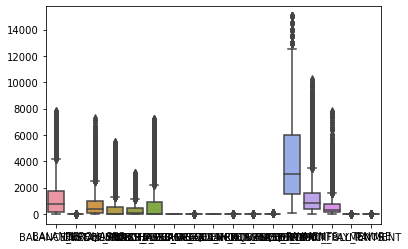

In [16]:
sns.boxplot(data=df1)

### c. Deal with correlated variables

<AxesSubplot:>

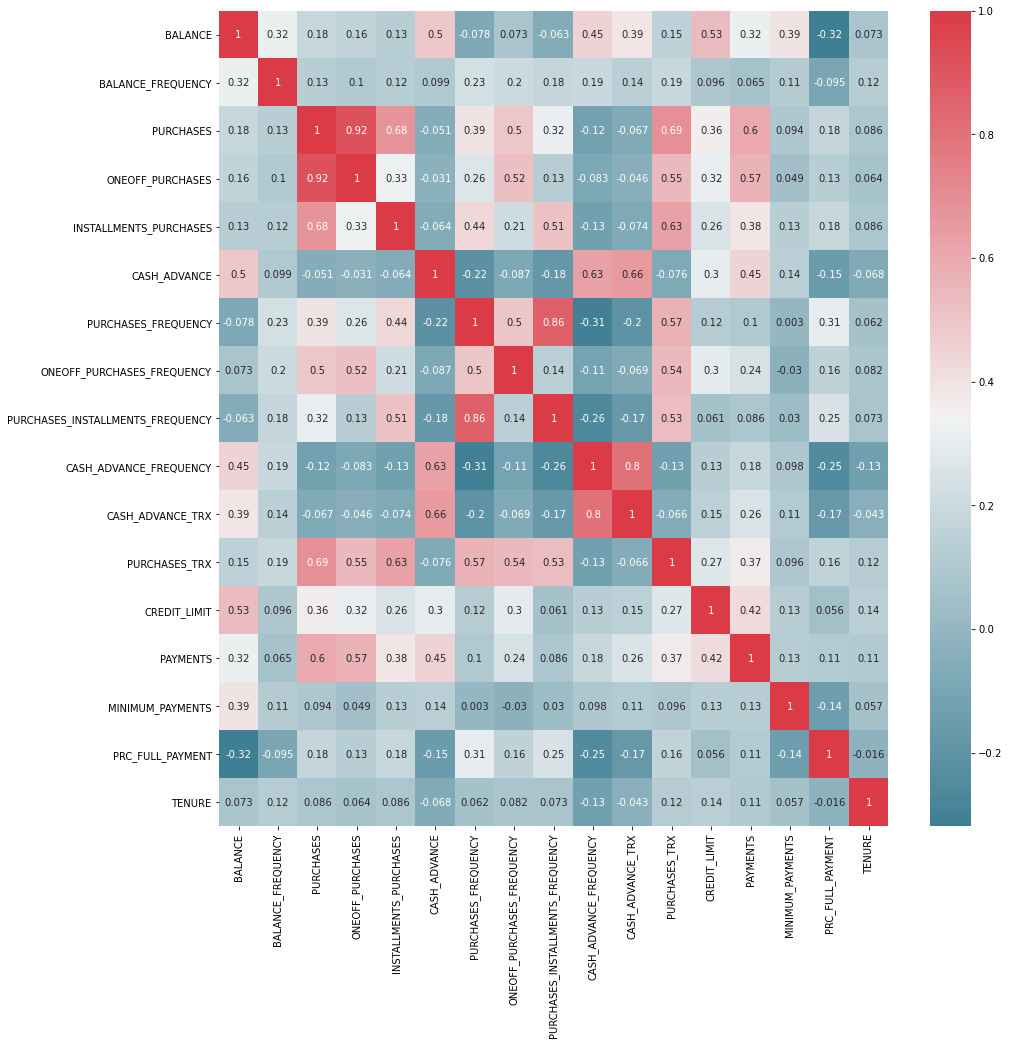

In [17]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr(), annot = True, cmap=cmap)

In [18]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [19]:
high_corr_var

[('PURCHASES', 'ONEOFF_PURCHASES'),
 ('PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY')]

### Perform dimensionality reduction using PCA

In [20]:
from sklearn.decomposition import PCA

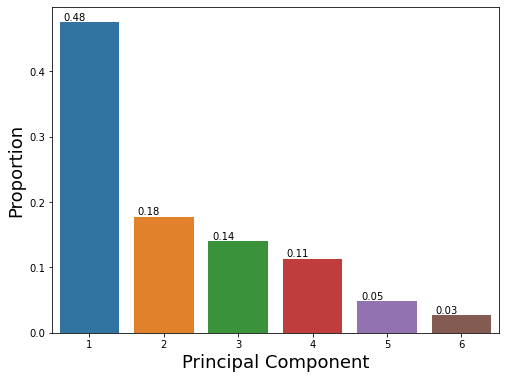

In [21]:
sk_pca = PCA(n_components=6)
sk_pca.fit(df)
dset2 = pd.DataFrame()
dset2['pca'] = range(1,7)
dset2['vari'] = pd.DataFrame(sk_pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset2)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


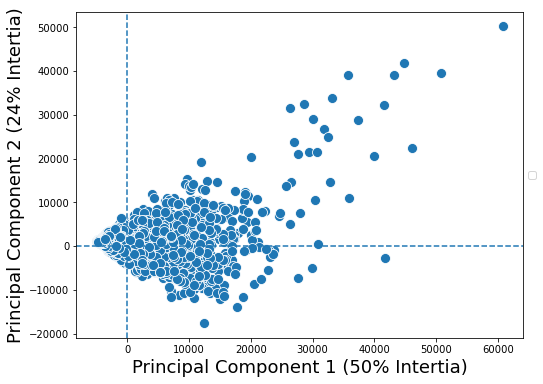

In [22]:
x_pca = sk_pca.transform(df[df.columns])

plt.figure(figsize=(8,6)) 
sns.scatterplot(x_pca[:,0],x_pca[:,1], 
                palette="Set1", legend='full', s=100).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Principal Component 1 (50% Intertia)',fontsize=18)
plt.ylabel('Principal Component 2 (24% Intertia)', fontsize=18)
plt.axvline(0, ls='--') 
plt.axhline(0, ls='--') 
plt.show()

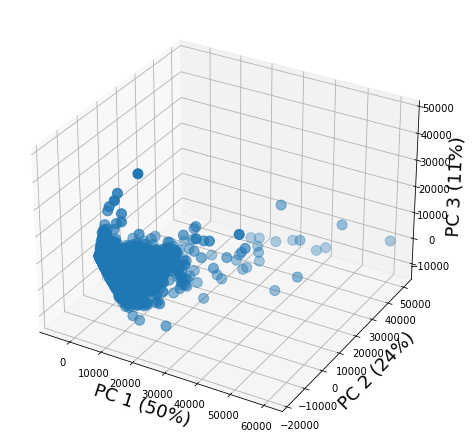

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6)) 
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2], s=100, cmap="Set1")
ax.set_xlabel('PC 1 (50%)',fontsize=18)
ax.set_ylabel('PC 2 (24%)',fontsize=18)
ax.set_zlabel('PC 3 (11%)',fontsize=18) 
plt.show()

### Build a model with multiple k

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,5,6,7,8]
for k in n_clusters:
          cluster=KMeans(n_clusters=k,random_state=10)
          predict=cluster.fit_predict(df)
          score=silhouette_score(df,predict,random_state=10)
          print("(for n_clusters={},silhouette_score  is {})".format(k,score))

(for n_clusters=2,silhouette_score  is 0.5116394454786315)
(for n_clusters=5,silhouette_score  is 0.3998606898546656)
(for n_clusters=6,silhouette_score  is 0.4088276878303396)
(for n_clusters=7,silhouette_score  is 0.3700412970721864)
(for n_clusters=8,silhouette_score  is 0.3816968297205202)


### Elbow method

In [25]:
from sklearn.cluster import KMeans

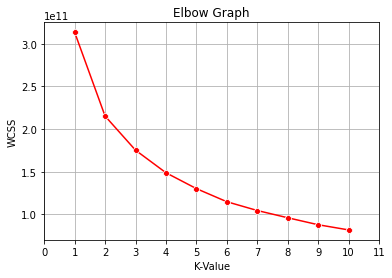

In [26]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()    
    

In [27]:
model = KMeans(n_clusters= 2, random_state= 10)

# fit the model
model.fit(df)

KMeans(n_clusters=2, random_state=10)

In [28]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [29]:
df_catagorical_columns=df.select_dtypes(include=['object']).columns.tolist()

In [30]:
for i in df_catagorical_columns:
    print(i,"-->",df[i].unique())